In [170]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [171]:
import pandas as pd

# CSV 파일 경로
file_path = '/Users/minjiku/Desktop/비정태적CNN/restaurant_final.csv'

# CSV 파일 읽기
df = pd.read_csv(file_path, encoding='euc-kr')  # 'euc-kr' 대신 탐지된 인코딩 사용
df

,폐업여부,식당명,방송,행정동_코드_명,nearest_station,distance_to_nearest_station,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,...,유튜브 번역본 감성점수(긍부정),유튜브 번역본 감성점수(자극),구글리뷰 번역본 감성점수(긍부정),구글리뷰 번역본 감성점수(자극),블로그 리뷰(KNU),유튜브 리뷰 감성점수(KNU),구글리뷰 감성점수(KNU),구글리뷰_딥러닝,블로그리뷰_딥러닝,유튜브리뷰_딥러닝
0,0,대관원,수요미식회,당산2동,영등포구청,427.979840,8619875,4075087,4544787,1218940,...,6.267340,4.185316,6.269821,4.160617,30.379310,7.636364,4.193548,0.399417,0.610678,0.463462
1,1,민어집병우네,수요미식회,삼청동,안국,867.079379,1014093,472938,541156,126746,...,NaN,NaN,6.053164,4.181775,8.000000,inf,2.909091,0.479167,0.846154,NaN
2,1,청담테라,수요미식회,청담동,청담,590.229621,9238591,4335955,4902638,1143595,...,NaN,NaN,6.411847,4.220417,11.771930,inf,2.882353,0.478723,0.793199,NaN
3,1,코퍼룸,수요미식회,삼성동,선정릉,122.850548,7246114,3653456,3592659,722334,...,6.512050,3.995539,6.438266,4.106188,113.999998,1.500000,4.684211,0.573248,0.752294,0.384615
4,0,툇마루밥상,수요미식회,문정1동,문정,236.110155,4430657,2097342,2333315,635451,...,6.845521,4.590573,6.265922,4.044775,39.230769,20.000000,50.000000,0.482270,0.718505,0.538462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,0,성북동돼지갈비,6시내고향,성북동,한성대입구(삼선교),1045.105997,4255521,1957418,2298102,728785,...,NaN,NaN,6.073680,4.016055,6.750000,NaN,3.633333,0.420886,0.463415,NaN
402,0,여기가전집,6시내고향,종로1?2?3?4가동,구로디지털단지,219.775656,14243910,7624681,6619228,696875,...,NaN,NaN,6.376462,4.285335,25.307692,inf,5.666667,0.534483,0.689215,0.000000
403,0,본점최대포,6시내고향,도화동,공덕,34.521700,4161039,1907018,2254020,460393,...,NaN,NaN,6.264756,4.159812,inf,NaN,3.333333,0.449275,0.409091,NaN
404,0,능라밥상,6시내고향,교남동,독립문,576.661452,3947004,1821802,2125203,820611,...,NaN,NaN,6.375562,3.913136,3.000000,NaN,5.166667,0.482143,0.636364,NaN


### Null imputation

감성점수 다 채우면 수정하기

In [172]:
# 아직 감성점수 칼럼이 완성되지 않아서 임시로 그 칼럼의 평균으로 채워넣고 일단 코드 정리함. 
columns = ['블로그 번역본 감성점수(긍부정)', '블로그 번역본 감성점수 (자극)','블로그 리뷰(KNU)',
       '유튜브 번역본 감성점수(긍부정)', '유튜브 번역본 감성점수(자극)', '구글리뷰 번역본 감성점수(긍부정)',
       '구글리뷰 번역본 감성점수(자극)', '유튜브 리뷰 감성점수(KNU)', '구글리뷰 감성점수(KNU)', '구글리뷰_딥러닝',
       '블로그리뷰_딥러닝', '유튜브리뷰_딥러닝']

for col in columns:
    df[col].fillna(df[col].mean(), inplace=True)


In [173]:
import numpy as np

df = df.replace(np.inf, 9999)

for col in df.columns:
    print(col, df[col].isna().sum())

폐업여부 0
식당명 0
방송 0
행정동_코드_명 0
nearest_station 0
distance_to_nearest_station 0
총_유동인구_수 0
남성_유동인구_수 0
여성_유동인구_수 0
연령대_10_유동인구_수 0
연령대_20_유동인구_수 0
연령대_30_유동인구_수 0
연령대_40_유동인구_수 0
연령대_50_유동인구_수 0
연령대_60_이상_유동인구_수 0
시간대_06_11_유동인구_수 0
시간대_11_14_유동인구_수 0
시간대_14_17_유동인구_수 0
시간대_17_21_유동인구_수 0
시간대_21_24_유동인구_수 0
운영_영업_개월_평균 0
폐업_영업_개월_평균 0
총_상주인구_수 0
총_가구_수 0
총_직장_인구_수 0
아파트_단지_수 0
아파트_평균_시가 0
집객시설_수 0
관공서_수 0
은행_수 0
종합병원_수 0
일반_병원_수 0
약국_수 0
유치원_수 0
초등학교_수 0
중학교_수 0
고등학교_수 0
대학교_수 0
백화점_수 0
슈퍼마켓_수 0
숙박_시설_수 0
공항_수 0
버스_정거장_수 0
비식품생활비_지출_총금액 0
유흥및여가_지출_총금액 0
교육_지출_총금액 0
식료품_지출_총금액 0
지출_총금액 0
행정동_코드 0
블로그 번역본 감성점수(긍부정) 0
블로그 번역본 감성점수 (자극) 0
유튜브 번역본 감성점수(긍부정) 0
유튜브 번역본 감성점수(자극) 0
구글리뷰 번역본 감성점수(긍부정) 0
구글리뷰 번역본 감성점수(자극) 0
블로그 리뷰(KNU) 0
유튜브 리뷰 감성점수(KNU) 0
구글리뷰 감성점수(KNU) 0
구글리뷰_딥러닝 0
블로그리뷰_딥러닝 0
유튜브리뷰_딥러닝 0


### 방송 원핫인코딩

In [174]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# 3. 원핫 인코딩: '방송'
ohencoder = OneHotEncoder(drop=None, sparse_output=False)  # drop=None: 모든 카테고리 인코딩
encoded_array = ohencoder.fit_transform(df[['방송']])
# encoded_array = np.array(encoded_array)

# 인코딩된 결과를 데이터프레임으로 변환
encoded_df = pd.DataFrame(encoded_array, columns=ohencoder.get_feature_names_out(['방송']))

# 기존 데이터프레임에 추가 또는 결합
df = pd.concat([df.drop(columns='방송', axis=1), encoded_df], axis=1)

# 처리 완료된 데이터프레임 출력
df

,폐업여부,식당명,행정동_코드_명,nearest_station,distance_to_nearest_station,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,...,구글리뷰 감성점수(KNU),구글리뷰_딥러닝,블로그리뷰_딥러닝,유튜브리뷰_딥러닝,방송_6시내고향,방송_골목식당,방송_또간집,방송_맛있는 녀석들,방송_생활의달인,방송_수요미식회
0,0,대관원,당산2동,영등포구청,427.979840,8619875,4075087,4544787,1218940,1569054,...,4.193548,0.399417,0.610678,0.463462,0.0,0.0,0.0,0.0,0.0,1.0
1,1,민어집병우네,삼청동,안국,867.079379,1014093,472938,541156,126746,156946,...,2.909091,0.479167,0.846154,0.485353,0.0,0.0,0.0,0.0,0.0,1.0
2,1,청담테라,청담동,청담,590.229621,9238591,4335955,4902638,1143595,1426085,...,2.882353,0.478723,0.793199,0.485353,0.0,0.0,0.0,0.0,0.0,1.0
3,1,코퍼룸,삼성동,선정릉,122.850548,7246114,3653456,3592659,722334,1428629,...,4.684211,0.573248,0.752294,0.384615,0.0,0.0,0.0,0.0,0.0,1.0
4,0,툇마루밥상,문정1동,문정,236.110155,4430657,2097342,2333315,635451,676161,...,50.000000,0.482270,0.718505,0.538462,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,0,성북동돼지갈비,성북동,한성대입구(삼선교),1045.105997,4255521,1957418,2298102,728785,685283,...,3.633333,0.420886,0.463415,0.485353,1.0,0.0,0.0,0.0,0.0,0.0
402,0,여기가전집,종로1?2?3?4가동,구로디지털단지,219.775656,14243910,7624681,6619228,696875,2847723,...,5.666667,0.534483,0.689215,0.000000,1.0,0.0,0.0,0.0,0.0,0.0
403,0,본점최대포,도화동,공덕,34.521700,4161039,1907018,2254020,460393,576210,...,3.333333,0.449275,0.409091,0.485353,1.0,0.0,0.0,0.0,0.0,0.0
404,0,능라밥상,교남동,독립문,576.661452,3947004,1821802,2125203,820611,467556,...,5.166667,0.482143,0.636364,0.485353,1.0,0.0,0.0,0.0,0.0,0.0


In [175]:
df.to_csv("/Users/minjiku/Desktop/비정태적CNN/dfforeda.csv", index=False)

### SMOTE로 0,1 비율 맞춰주기

In [176]:
# X,y 나누기
from sklearn.model_selection import train_test_split

# 필요 없는 칼럼 삭제하고 임시 저장
df.drop(['식당명','행정동_코드_명','행정동_코드','nearest_station'], axis=1, inplace=True)
df.to_csv('/Users/minjiku/Desktop/비정태적CNN/restaurant_save_point.csv')

In [177]:
# 상관관계 기반 피처 선택
correlation_matrix = df.corr()
high_correlation_features = correlation_matrix["폐업여부"][abs(correlation_matrix["폐업여부"]) > 0.05].index

df = df[high_correlation_features]
df

,폐업여부,distance_to_nearest_station,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_20_유동인구_수,연령대_30_유동인구_수,연령대_40_유동인구_수,연령대_50_유동인구_수,연령대_60_이상_유동인구_수,...,구글리뷰 번역본 감성점수(자극),블로그 리뷰(KNU),유튜브 리뷰 감성점수(KNU),구글리뷰_딥러닝,블로그리뷰_딥러닝,유튜브리뷰_딥러닝,방송_6시내고향,방송_골목식당,방송_또간집,방송_생활의달인
0,0,427.979840,8619875,4075087,4544787,1569054,1947546,1427072,1063235,1394028,...,4.160617,30.379310,7.636364,0.399417,0.610678,0.463462,0.0,0.0,0.0,0.0
1,1,867.079379,1014093,472938,541156,156946,173859,192565,157783,206194,...,4.181775,8.000000,9999.000000,0.479167,0.846154,0.485353,0.0,0.0,0.0,0.0
2,1,590.229621,9238591,4335955,4902638,1426085,1918078,1929817,1360669,1460349,...,4.220417,11.771930,9999.000000,0.478723,0.793199,0.485353,0.0,0.0,0.0,0.0
3,1,122.850548,7246114,3653456,3592659,1428629,1095998,995716,1052973,1950465,...,4.106188,113.999998,1.500000,0.573248,0.752294,0.384615,0.0,0.0,0.0,0.0
4,0,236.110155,4430657,2097342,2333315,676161,877453,766226,607601,867766,...,4.044775,39.230769,20.000000,0.482270,0.718505,0.538462,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,0,1045.105997,4255521,1957418,2298102,685283,623281,644887,654583,918703,...,4.016055,6.750000,9999.000000,0.420886,0.463415,0.485353,1.0,0.0,0.0,0.0
402,0,219.775656,14243910,7624681,6619228,2847723,2913814,2715992,2312188,2757316,...,4.285335,25.307692,9999.000000,0.534483,0.689215,0.000000,1.0,0.0,0.0,0.0
403,0,34.521700,4161039,1907018,2254020,576210,854239,766622,628318,875255,...,4.159812,9999.000000,9999.000000,0.449275,0.409091,0.485353,1.0,0.0,0.0,0.0
404,0,576.661452,3947004,1821802,2125203,467556,517938,690624,605745,844528,...,3.913136,3.000000,9999.000000,0.482143,0.636364,0.485353,1.0,0.0,0.0,0.0


In [178]:
X = df.drop('폐업여부', axis=1)  # feature columns
y = df['폐업여부']  # target column
col_name = X.columns
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [179]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [180]:
# SMOTE 적용
from imblearn.over_sampling import SMOTE
print("Before SMOTE:")
print(y_train.value_counts())

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

print("\nAfter SMOTE:")
print(pd.Series(y_train).value_counts())


Before SMOTE:
폐업여부
0    296
1     28
Name: count, dtype: int64

After SMOTE:
폐업여부
0    296
1    296
Name: count, dtype: int64


In [181]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 적용
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)  # Train 데이터에 fit 후 transform
X_test = scaler.transform(X_test) 

# 모델

## FDA

Accuracy: 0.9024390243902439

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95        75
           1       0.33      0.14      0.20         7

    accuracy                           0.90        82
   macro avg       0.63      0.56      0.57        82
weighted avg       0.87      0.90      0.88        82


Confusion Matrix:
[[73  2]
 [ 6  1]]


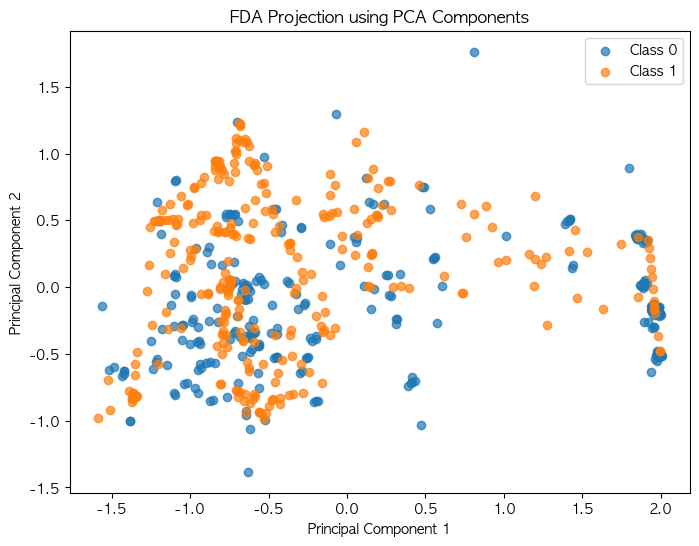

In [182]:
# FDA를 구현하기 위한 데이터 변형
# 1. PCA를 통해 주요 축 추출
pca = PCA(n_components=5)  # 중요한 차원으로 축소
X_pca = pca.fit_transform(X_train)

# 2. 기존 데이터에 PCA 축 포함
X_fda = np.hstack([X_train, X_pca])

# FDA: 특정 클래스 간의 변별력을 강조하는 랜덤 포레스트 학습
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 성능 평가
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# PCA 시각화를 통한 FDA의 주요 축 확인
plt.figure(figsize=(8, 6))
for class_value in [0, 1]:
    plt.scatter(
        X_pca[y_train.values == class_value, 0],
        X_pca[y_train.values == class_value, 1],
        label=f"Class {class_value}",
        alpha=0.7
    )
plt.title("FDA Projection using PCA Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

In [69]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

## AdaBoost

In [70]:

# AdaBoost 모델 학습
adaboost_model = AdaBoostClassifier(random_state=42, n_estimators=100)
adaboost_model.fit(X_train, y_train)

# 예측
y_pred = adaboost_model.predict(X_test)

# 성능 평가
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Accuracy: 0.8780487804878049

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        75
           1       0.29      0.29      0.29         7

    accuracy                           0.88        82
   macro avg       0.61      0.61      0.61        82
weighted avg       0.88      0.88      0.88        82


Confusion Matrix:
[[70  5]
 [ 5  2]]


## 인공신경망

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.layers import Dropout

# 2. ANN 모델 생성
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # 첫 은닉층 (뉴런 64개)
    Dropout(0.3),
    Dense(32, activation='relu'),                                  # 두 번째 은닉층 (뉴런 32개)
    Dropout(0.3),
    Dense(1, activation='sigmoid')                                # 출력층 (이진 분류)
])

# 3. 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss=BinaryCrossentropy(),
              metrics=['accuracy'])

# 4. 모델 학습
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

from sklearn.metrics import classification_report

# 6. 예측
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)
loss, accuracy = model.evaluate(X_test, y_test)

print(classification_report(y_test, y_pred_binary))
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4139 - loss: 0.7628 - val_accuracy: 1.0000 - val_loss: 0.6134
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4495 - loss: 0.7307 - val_accuracy: 0.9076 - val_loss: 0.6544
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5095 - loss: 0.7001 - val_accuracy: 0.4958 - val_loss: 0.6944
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5484 - loss: 0.6890 - val_accuracy: 0.2521 - val_loss: 0.7266
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5562 - loss: 0.6877 - val_accuracy: 0.0924 - val_loss: 0.7575
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5883 - loss: 0.6738 - val_accuracy: 0.0000e+00 - val_loss: 0.7836
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6367 - loss: 0.6540 - val_accuracy: 0.0000e+00 - val_loss: 0.8055
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6018 - loss: 0.6470 - val_accuracy: 0.

## Elastic Net

In [40]:
from sklearn.linear_model import ElasticNet

# 4. ElasticNet 모델 초기화 및 학습
model = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)  # alpha와 l1_ratio는 하이퍼파라미터입니다.
model.fit(X_train, y_train)

# 5. 예측 및 평가
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)  # 예측 값을 0과 1로 변환

from sklearn.metrics import accuracy_score, roc_auc_score
# 성능 평가
accuracy = accuracy_score(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')

Accuracy: 0.8293
ROC AUC: 0.5829


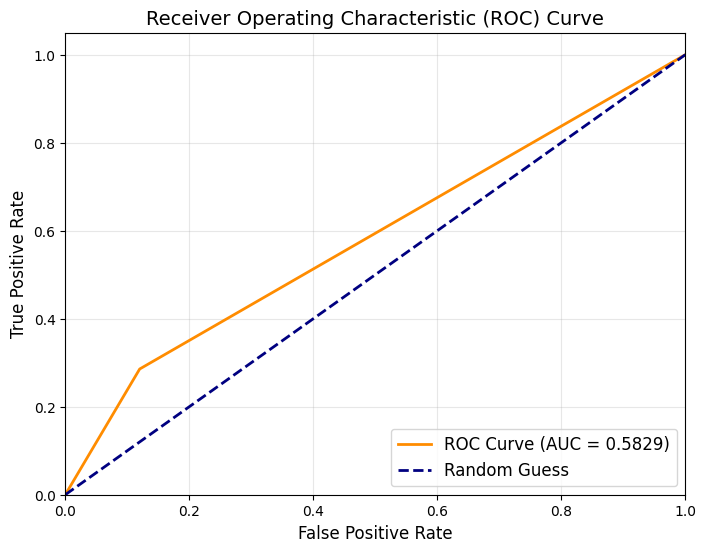

In [41]:
# ROC Curve 시각화
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# ROC Curve 데이터 계산
fpr, tpr, thresholds = roc_curve(y_test, y_pred)  # y_pred는 확률 예측 값
roc_auc = auc(fpr, tpr)  # AUC 값 계산

# ROC Curve 시각화
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

## Logistic Regression

In [184]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, classification_report, roc_auc_score, confusion_matrix, recall_score

# 클래스 가중치와 모델 설정
classweight = {0:1, 1:2}
logistic_model = LogisticRegression(random_state=42, class_weight=classweight, max_iter=1000, penalty='l2')

# 1. 모델 학습
logistic_model.fit(X_train, y_train)

# 2. 예측
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]  # 양성 클래스(1)의 확률값
optimal_threshold = 0.5  # 임계값 설정
y_pred = (y_pred_proba >= optimal_threshold).astype(int)

# 3. 혼동 행렬 계산
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# 4. 특이도(Specificity)와 민감도(Sensitivity) 계산
sensitivity = tp / (tp + fn)  # 민감도 = TP / (TP + FN)
specificity = tn / (tn + fp)  # 특이도 = TN / (TN + FP)

# 5. 평가
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
f1 = f1_score(y_test, y_pred)

print(f"Optimal Threshold: {optimal_threshold:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"F1: {f1:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Optimal Threshold: 0.5000
Accuracy: 0.8049
ROC AUC: 0.8095
F1: 0.4286
Sensitivity (Recall): 0.8571
Specificity: 0.8000

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.80      0.88        75
           1       0.29      0.86      0.43         7

    accuracy                           0.80        82
   macro avg       0.63      0.83      0.66        82
weighted avg       0.92      0.80      0.84        82



/var/folders/v_/ccwz5s7931bf1s6yx_rzlzqm0000gn/T/ipykernel_84011/1105633850.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='coolwarm')


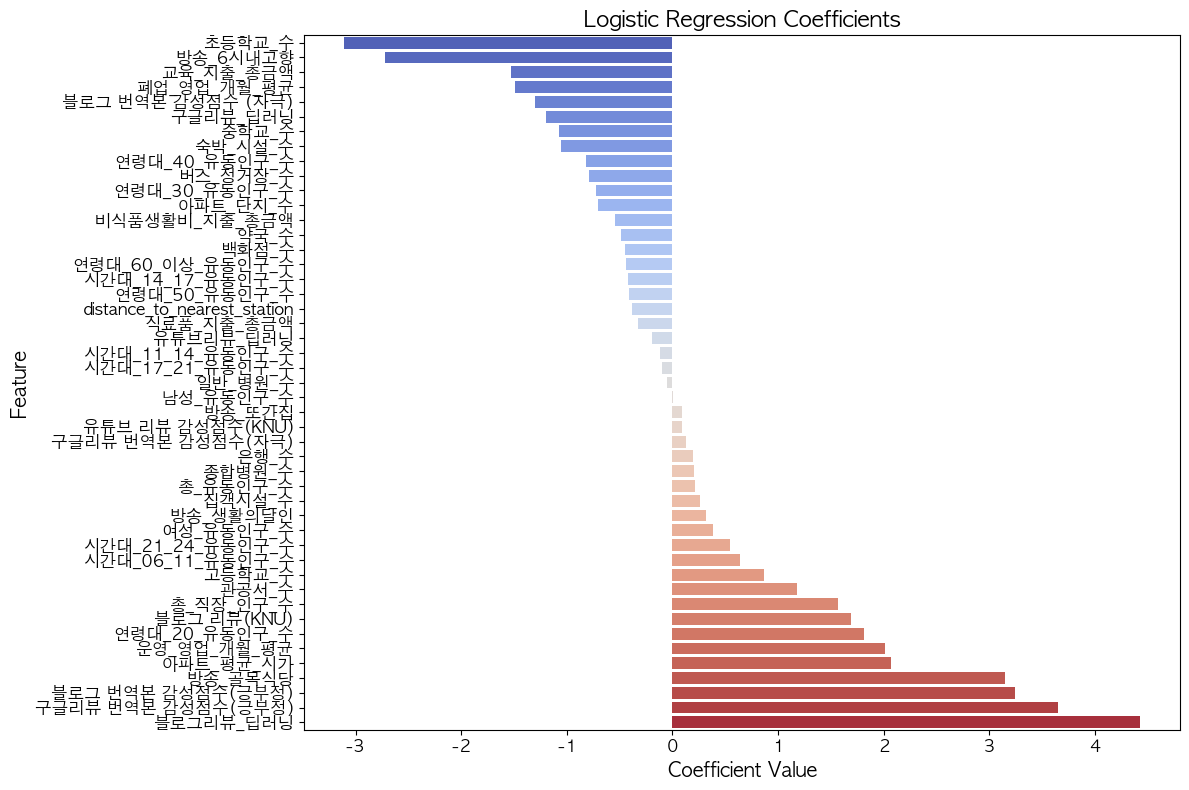

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns

# 계수 추출 및 정렬 (이미 수행됨)
coefficients = coefficients.sort_values(by='Coefficient', ascending=True)

# 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='coolwarm')

# 그래프 꾸미기
plt.title('Logistic Regression Coefficients', fontsize=16, fontweight='bold')
plt.xlabel('Coefficient Value', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 시각화 출력
plt.tight_layout()
plt.show()


In [167]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


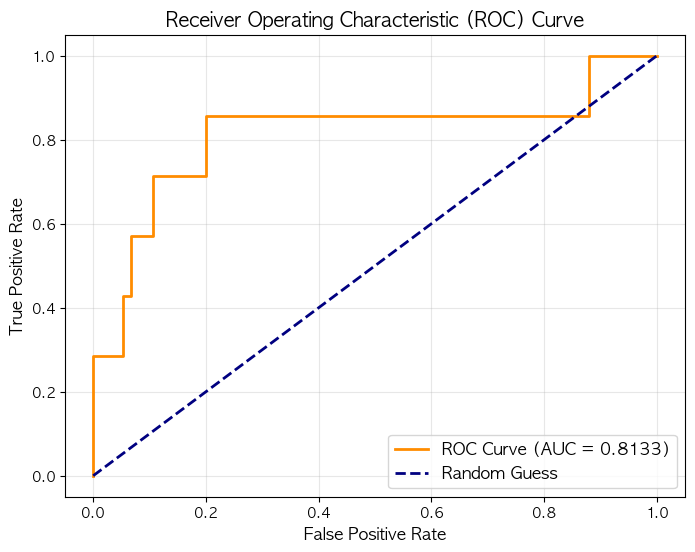

In [126]:
# 5. ROC Curve 시각화
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

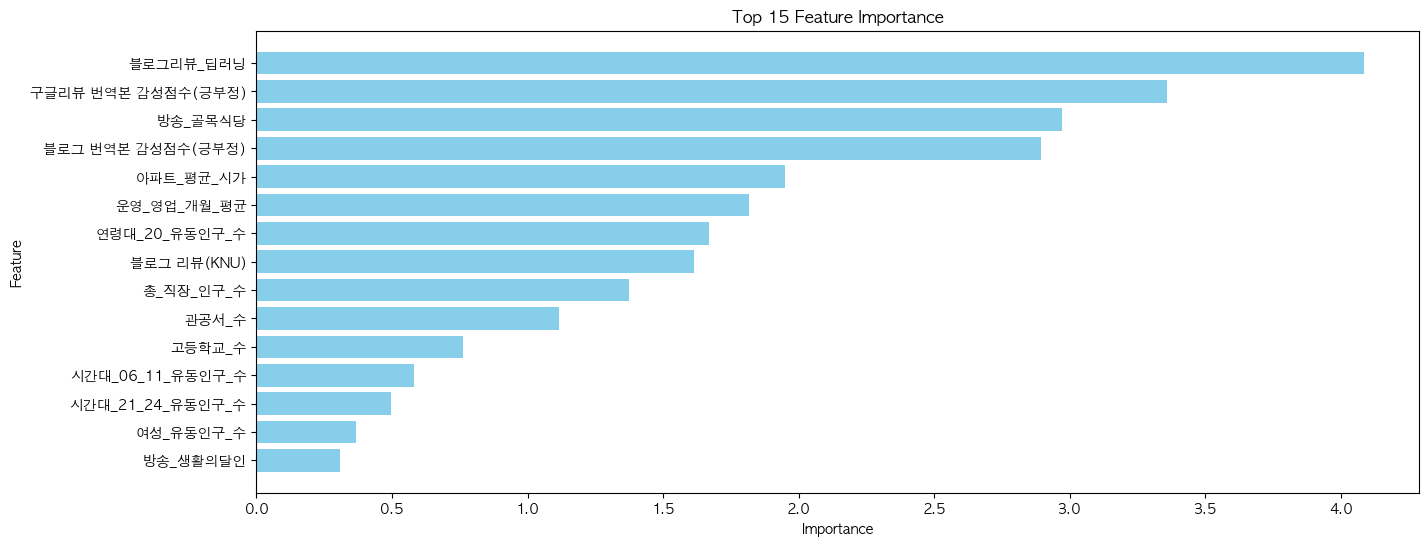

Feature Importance:
                         Feature  Importance
41                    블로그리뷰_딥러닝    4.082877
36           구글리뷰 번역본 감성점수(긍부정)    3.356800
44                      방송_골목식당    2.969899
34            블로그 번역본 감성점수(긍부정)    2.894332
18                    아파트_평균_시가    1.948068
14                  운영_영업_개월_평균    1.815043
4                 연령대_20_유동인구_수    1.669631
38                  블로그 리뷰(KNU)    1.612091
16                    총_직장_인구_수    1.374320
20                        관공서_수    1.115060
27                       고등학교_수    0.762449
9              시간대_06_11_유동인구_수    0.580149
13             시간대_21_24_유동인구_수    0.496319
3                     여성_유동인구_수    0.368694
46                     방송_생활의달인    0.308585
19                       집객시설_수    0.296272
37            구글리뷰 번역본 감성점수(자극)    0.203207
1                      총_유동인구_수    0.194996
21                         은행_수    0.175760
22                       종합병원_수    0.158354
45                       방송_또간집    0.077945
39         

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. 모델 가중치 추출
feature_importance = logistic_model.coef_[0]  # 가중치 (Coefficient)

# 2. 특성 이름과 가중치를 데이터프레임으로 정리
importance_df = pd.DataFrame({
    'Feature': col_name,  # 특성 이름
    'Importance': feature_importance  # 가중치
})

# 3. 중요도 절대값으로 정렬
# importance_df['Absolute_Importance'] = np.abs(importance_df['Importance'])
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 4. 상위 n개 특성 시각화
n_top_features = 15  # 상위 10개 특성
plt.figure(figsize=(15, 6))
plt.barh(importance_df['Feature'][:n_top_features], 
         importance_df['Importance'][:n_top_features], 
         color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 15 Feature Importance')
plt.gca().invert_yaxis()
plt.show()

# 5. 출력
print("Feature Importance:\n", importance_df)
